In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
%matplotlib inline

1. Preprocessing Data

In [3]:
# Import data
co2_df = pd.read_csv('global_co2.csv')
temp_df = pd.read_csv('annual_temp.csv')
print(co2_df.head())
print(temp_df.head())

   Year  Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
0  1751      3         0            0           3       0            0   
1  1752      3         0            0           3       0            0   
2  1753      3         0            0           3       0            0   
3  1754      3         0            0           3       0            0   
4  1755      3         0            0           3       0            0   

   Per Capita  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
    Source  Year    Mean
0     GCAG  2015  0.8990
1  GISTEMP  2015  0.8700
2     GCAG  2014  0.7402
3  GISTEMP  2014  0.7500
4     GCAG  2013  0.6687


In [ ]:
# Clean data
# untuk co2_df
co2_df = co2_df.iloc[:, :2]                                                 # Keep only first two columns
co2_df = co2_df[co2_df['Year'] >= 1960]                                     # Keep only rows where 'Year' >= 1960
co2_df.columns = ['Year', 'CO2']                                            # Rename columns
co2_df = co2_df.reset_index(drop=True)                                      # Reset index

# untuk temp_df
temp_df = temp_df[temp_df['Source'] != 'GISTEMP']                           # Keep only rows where 'Source' != 'GISTEMP'
temp_df = temp_df.drop('Source', axis=1)                                    # Drop 'Source' column
temp_df = temp_df.iloc[::-1]                                                # Reverse the index order
temp_df = temp_df[(temp_df['Year'] >= 1960) & (temp_df['Year'] <= 2010)]    # Keep rows where 1960 <= 'Year' <= 2010
temp_df.columns = ['Year', 'Temperature']                                   # Rename columns
temp_df = temp_df.reset_index(drop=True)                                    # Reset index

# Output hasil
print(co2_df.head())
print(temp_df.head())

   Year   CO2
0  1960  2569
1  1961  2580
2  1962  2686
3  1963  2833
4  1964  2995
   Year  Temperature
0  1960       0.0252
1  1961       0.0818
2  1962       0.0924
3  1963       0.1100
4  1964      -0.1461


In [5]:
# Concatenate
climate_change_df = pd.concat([co2_df, temp_df.Temperature], axis=1)

print(climate_change_df.head())

   Year   CO2  Temperature
0  1960  2569       0.0252
1  1961  2580       0.0818
2  1962  2686       0.0924
3  1963  2833       0.1100
4  1964  2995      -0.1461


2. Visualisasi Data
    3D Visualisasi

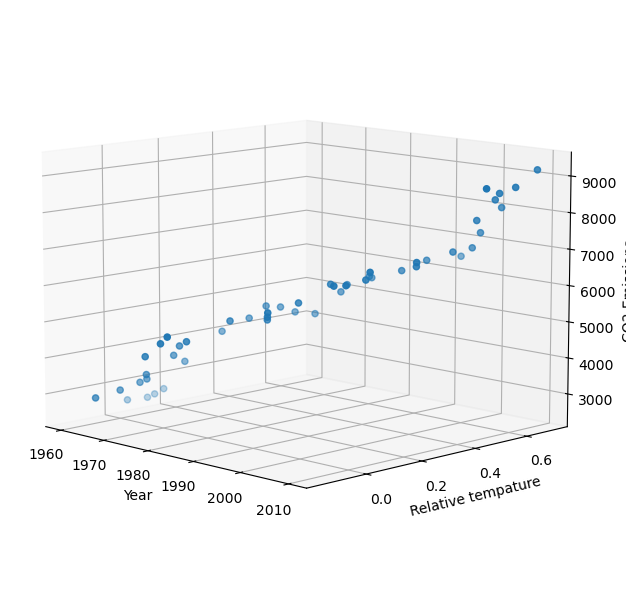

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=climate_change_df['Year'], ys=climate_change_df['Temperature'], zs=climate_change_df['CO2'])

ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.view_init(10, -45)

2D Visualisasi Data


Text(0, 0.5, 'Relative temperature')

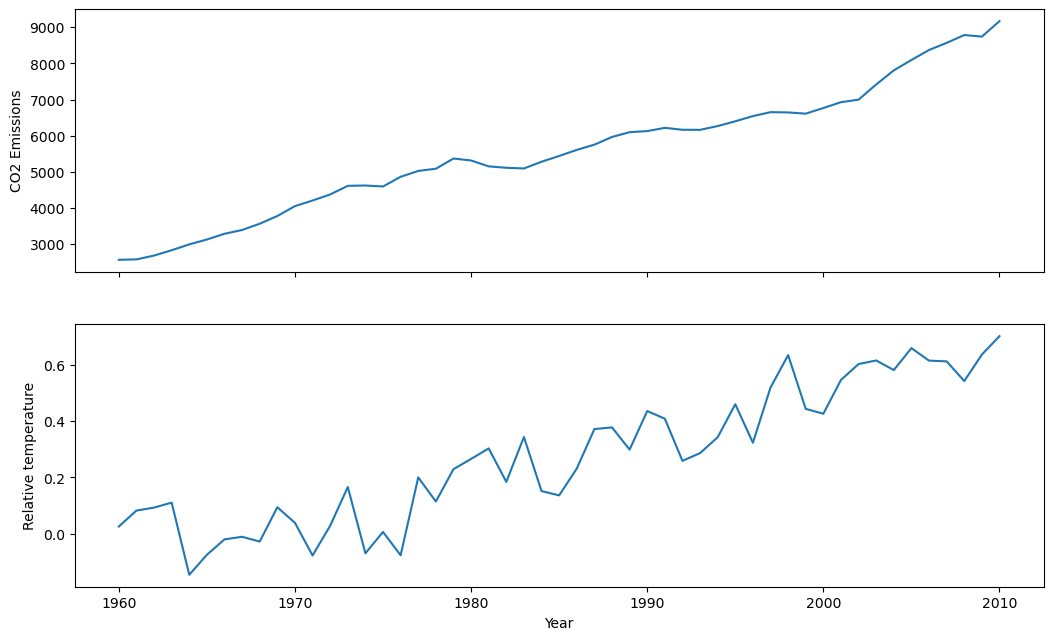

In [7]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')

In [9]:
X = climate_change_df[['Year']].values  # Pastikan 'Year' dalam bentuk array 2D
Y = climate_change_df[['CO2', 'Temperature']].values.astype('float32')  # Kolom target sebagai array 2D

# Membagi data menjadi training dan testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [11]:
# Import LinearRegression dari scikit-learn
from sklearn.linear_model import LinearRegression

# Membuat instance model LinearRegression
reg = LinearRegression()

# Melatih model dengan data training
reg.fit(X_train, y_train)

LinearRegression()

In [12]:
print('Score: ', reg.score(X_test.reshape(-1, 1), y_test))

Score:  0.9210452797111824


In [13]:
x_line = np.arange(1960,2011).reshape(-1,1)
p = reg.predict(x_line).T

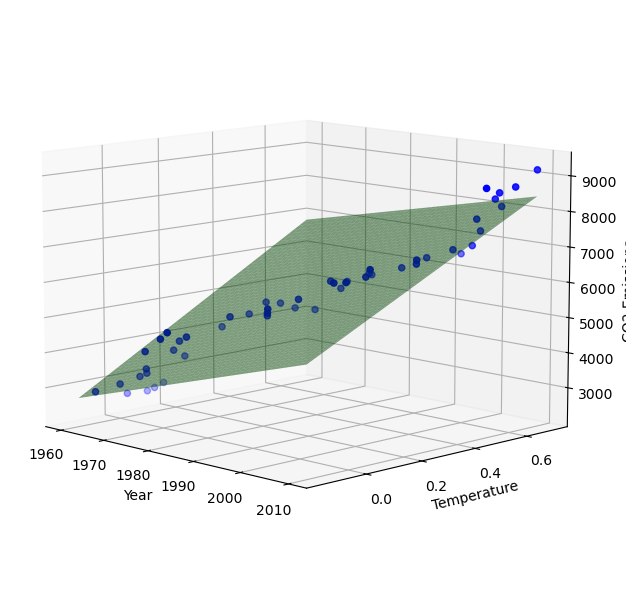

In [15]:
# Membuat model regresi linier (misalnya untuk CO2 vs Year dan Temperature)
reg = LinearRegression()

# Misalnya, kita ingin memprediksi CO2 berdasarkan Year dan Temperature
X = climate_change_df[['Year', 'Temperature']].values
Y = climate_change_df['CO2'].values

# Melatih model
reg.fit(X, Y)

# Membuat prediksi berdasarkan model regresi linier
x_line = np.linspace(min(climate_change_df['Year']), max(climate_change_df['Year']), 100)
y_line = np.linspace(min(climate_change_df['Temperature']), max(climate_change_df['Temperature']), 100)

# Membuat meshgrid untuk plot 3D
x_line, y_line = np.meshgrid(x_line, y_line)
z_line = reg.predict(np.c_[x_line.ravel(), y_line.ravel()]).reshape(x_line.shape)

# Membuat figure dan plot 3D
fig2 = plt.figure()
fig2.set_size_inches(12.5, 7.5)
ax = fig2.add_subplot(111, projection='3d')

# Plot data asli (scatter plot)
ax.scatter(climate_change_df['Year'], climate_change_df['Temperature'], climate_change_df['CO2'], label='Data', color='blue')

# Plot garis regresi
ax.plot_surface(x_line, y_line, z_line, color='green', alpha=0.5)

# Menambahkan label
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')
ax.set_zlabel('CO2 Emissions')

# Mengatur sudut tampilan
ax.view_init(10, -45)

# Menampilkan plot
plt.show()

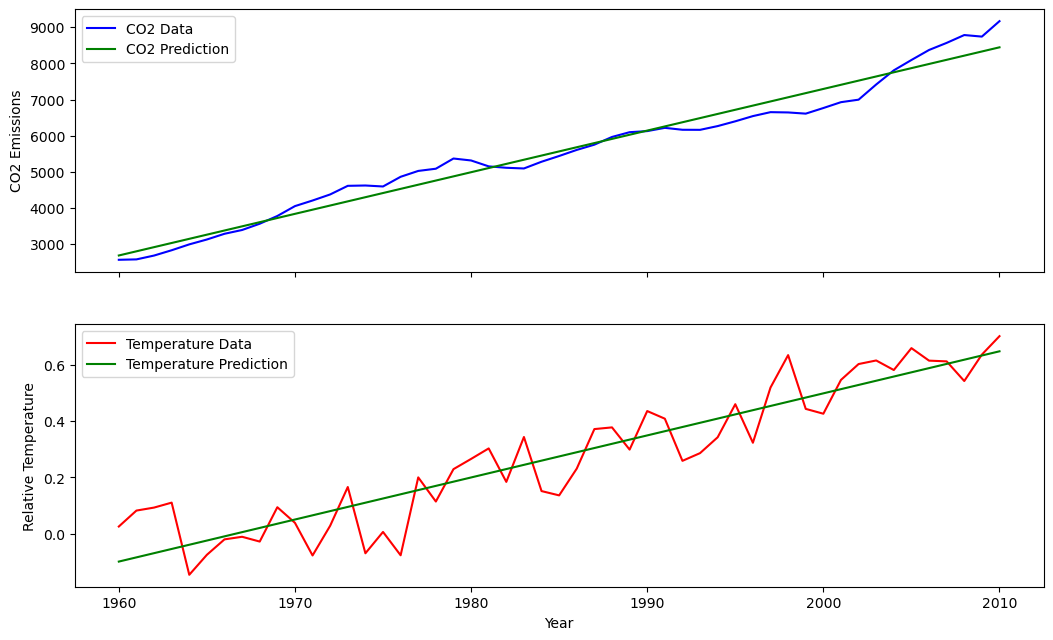

In [ ]:
# Melatih model regresi linier untuk CO2
reg_co2 = LinearRegression()
X = climate_change_df[['Year']].values  # 'Year' sebagai fitur
y_co2 = climate_change_df['CO2'].values
reg_co2.fit(X, y_co2)

# Melatih model regresi linier untuk Temperature
reg_temp = LinearRegression()
y_temp = climate_change_df['Temperature'].values
reg_temp.fit(X, y_temp)

# Membuat prediksi dengan menggunakan model yang telah dilatih
x_line = np.linspace(min(climate_change_df['Year']), max(climate_change_df['Year']), 100)
p_co2 = reg_co2.predict(x_line.reshape(-1, 1))
p_temp = reg_temp.predict(x_line.reshape(-1, 1))

# Membuat subplot
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)

# Plot untuk CO2
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'], label='CO2 Data', color='blue')
axarr[0].plot(x_line, p_co2, label='CO2 Prediction', color='green')
axarr[0].set_ylabel('CO2 Emissions')

# Plot untuk Temperature
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'], label='Temperature Data', color='red')
axarr[1].plot(x_line, p_temp, label='Temperature Prediction', color='green')
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative Temperature')

# Menampilkan legenda
axarr[0].legend()
axarr[1].legend()

# Menampilkan plot
plt.show()